In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the Data

zoo=pd.read_csv("Zoo.csv")

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo.size

1818

In [9]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [10]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

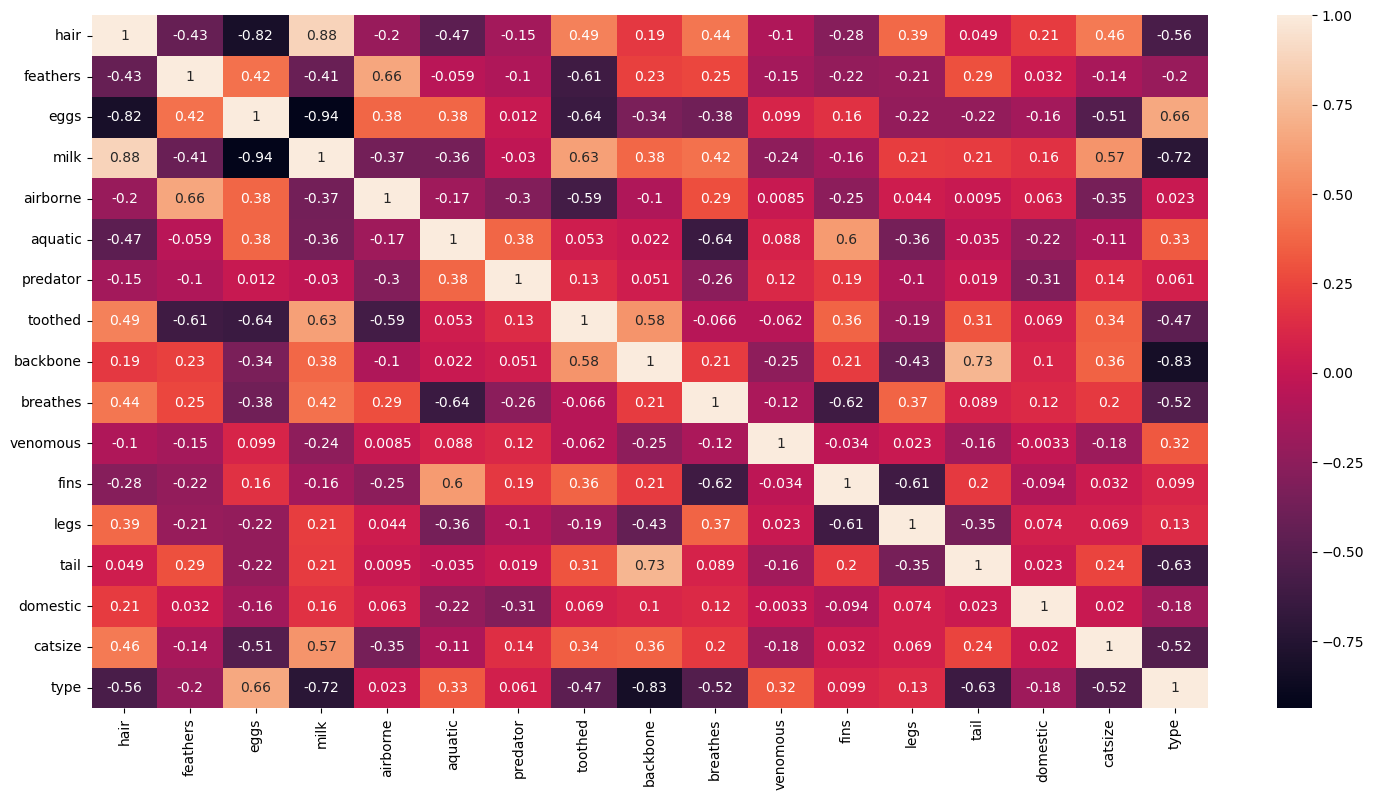

In [11]:
plt.figure(figsize=(18,9))
sns.heatmap(zoo.corr(),annot=True)

In [12]:
features=["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomus","fins","legs","tail","domestic","catsize","type"]

In [13]:
features

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomus',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

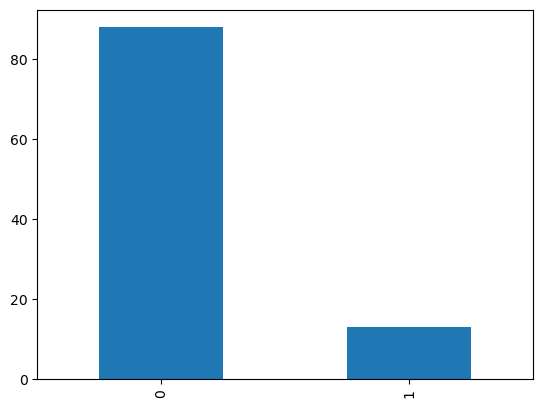

0    88
1    13
Name: domestic, dtype: int64


In [14]:
# From seaborn 

zoo['domestic'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['domestic'].value_counts())

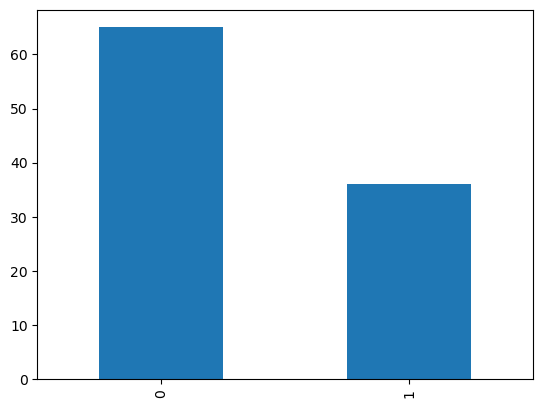

0    65
1    36
Name: aquatic, dtype: int64


In [15]:

zoo["aquatic"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["aquatic"].value_counts())

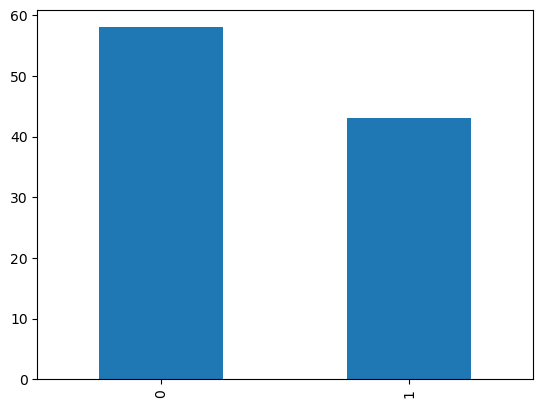

0    58
1    43
Name: hair, dtype: int64


In [16]:
zoo['hair'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['hair'].value_counts())


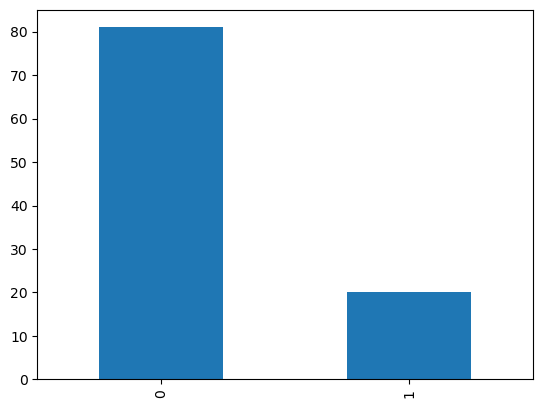

0    81
1    20
Name: feathers, dtype: int64


In [17]:
zoo['feathers'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['feathers'].value_counts())

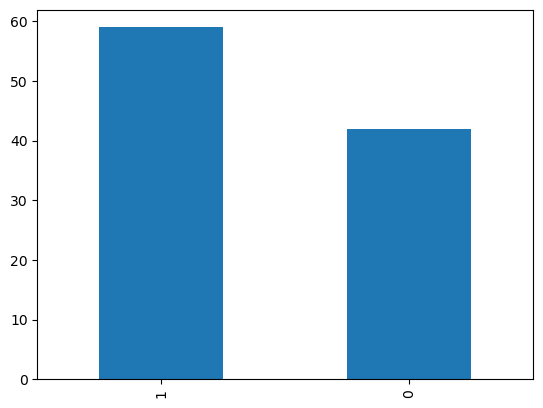

1    59
0    42
Name: eggs, dtype: int64


In [18]:
zoo['eggs'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['eggs'].value_counts())

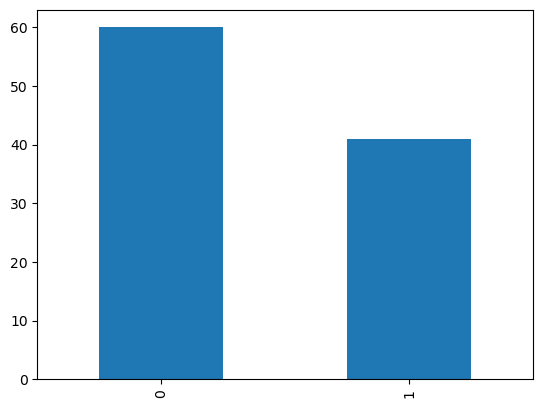

0    60
1    41
Name: milk, dtype: int64


In [19]:
zoo['milk'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['milk'].value_counts())

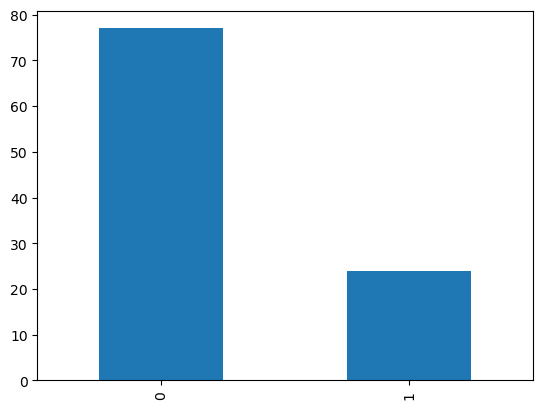

0    77
1    24
Name: airborne, dtype: int64


In [20]:
zoo['airborne'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['airborne'].value_counts())

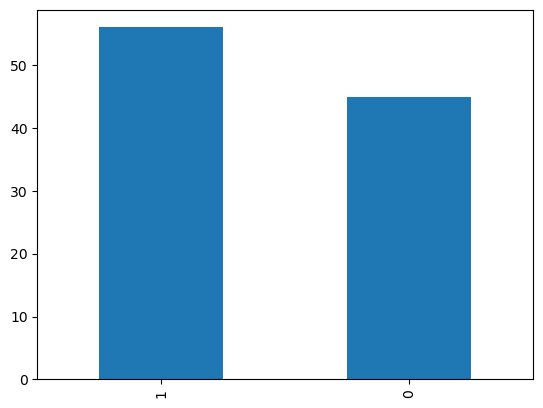

1    56
0    45
Name: predator, dtype: int64


In [21]:
zoo["predator"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['predator'].value_counts())



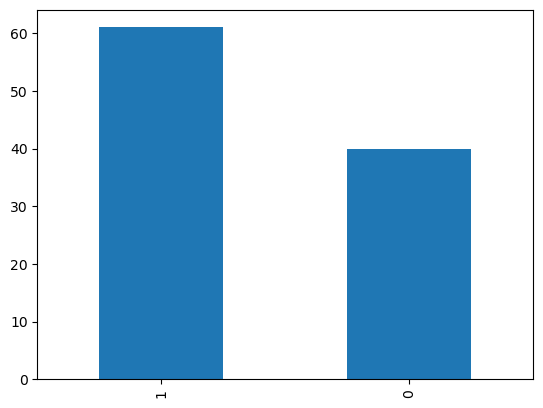

1    61
0    40
Name: toothed, dtype: int64


In [22]:
zoo["toothed"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["toothed"].value_counts())
 

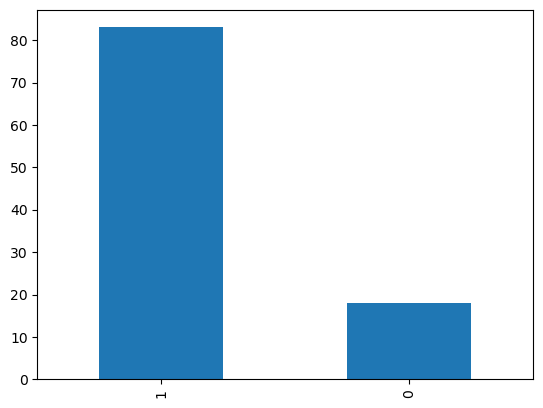

1    83
0    18
Name: backbone, dtype: int64


In [23]:
zoo["backbone"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["backbone"].value_counts())

 

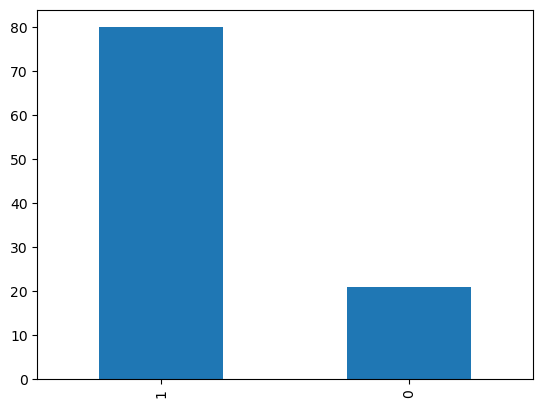

1    80
0    21
Name: breathes, dtype: int64


In [24]:
zoo["breathes"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["breathes"].value_counts())



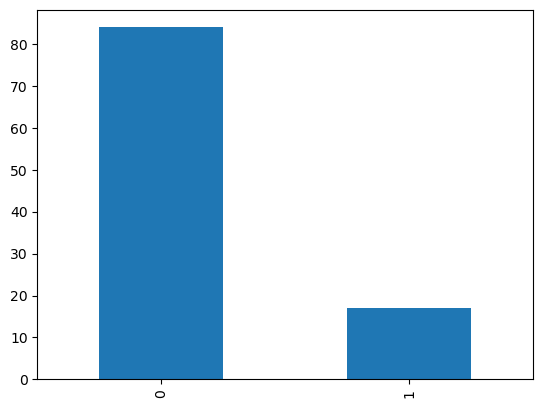

0    84
1    17
Name: fins, dtype: int64


In [25]:
zoo["fins"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["fins"].value_counts())



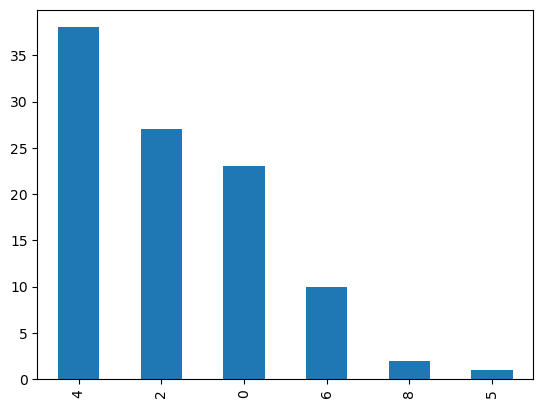

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64


In [26]:
zoo["legs"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["legs"].value_counts())

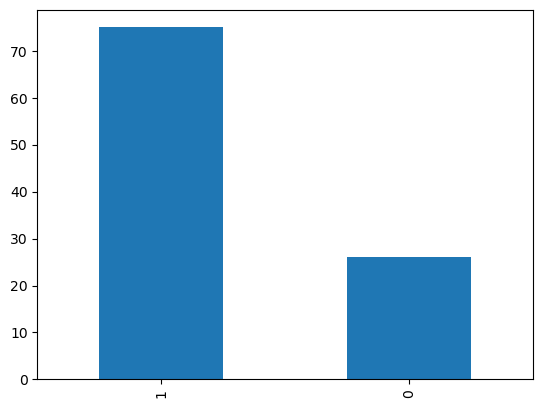

1    75
0    26
Name: tail, dtype: int64


In [27]:
zoo["tail"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["tail"].value_counts())

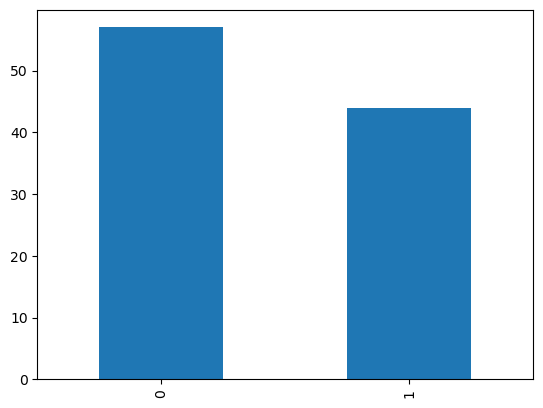

0    57
1    44
Name: catsize, dtype: int64


In [28]:
zoo["catsize"].value_counts(sort=True).plot.bar()
colors=["blue","yellow"]
plt.show()
print(zoo["catsize"].value_counts())

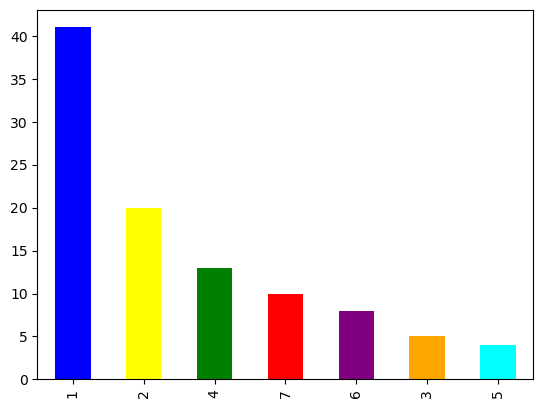

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [29]:
value_counts = zoo["type"].value_counts(sort=True)
colors = ["blue", "yellow", "green", "red", "purple", "orange", "cyan"]
value_counts.plot.bar(color=colors)
plt.show()
print(value_counts)


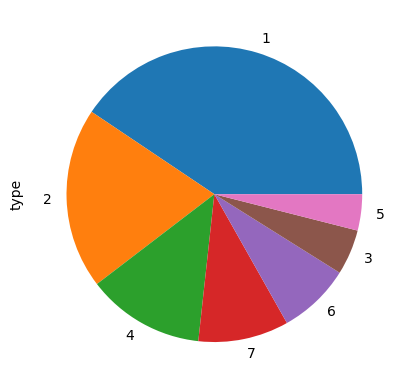

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [30]:
zoo["type"].value_counts(sort=True).plot.pie()
plt.show()
print(zoo["type"].value_counts())

In [31]:
array=zoo.values
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,-1]

In [32]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [33]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

#  Grid search for algorithm tuning

In [34]:
# Grid Search

num_folds=10
kfold=KFold(n_splits=5)

In [35]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [36]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [37]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [38]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


#  Grid Search on train dataset

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
train,test=train_test_split(zoo,test_size=0.2,random_state=40)


In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)


In [42]:
n_neighbors=np.array(range(1,45))
param_grid= dict(n_neighbors=n_neighbors)

In [43]:
model=KNeighborsClassifier()
grid1=GridSearchCV(estimator=model,param_grid=param_grid)
grid1.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])})

In [44]:
print(grid1.best_score_)
print(grid1.best_params_)

0.9625
{'n_neighbors': 1}


In [45]:
KNN_preds1 = grid1.predict(xtrain)
pd.crosstab(ytrain,KNN_preds1)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,32,0,0,0,0,0,0
2,0,14,0,0,0,0,0
3,0,0,4,0,0,0,0
4,0,0,0,11,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,6,0
7,0,0,0,0,0,0,10


#  Grid Search on test data set

In [46]:
n_neighbors=np.array(range(1,40))
param_grid= dict(n_neighbors=n_neighbors)

In [47]:
model_1=KNeighborsClassifier()
grid1=GridSearchCV(estimator=model_1,param_grid=param_grid)
grid1.fit(xtest,ytest)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [48]:
print(grid1.best_score_)
print(grid1.best_params_)

0.86
{'n_neighbors': 1}


#  Visualising the CV Results

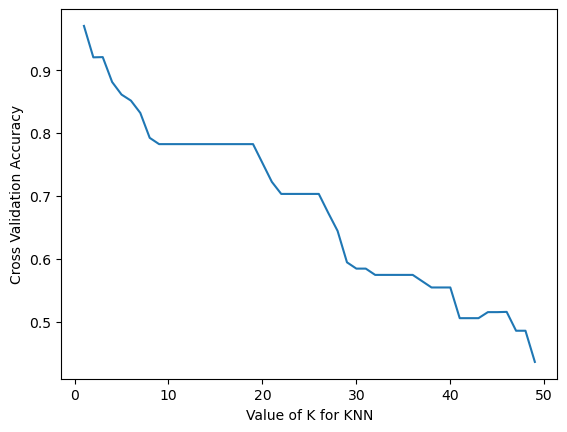

In [49]:
# Choosing the K range between  1 to 50

k_range=range(1,50)
k_scores=[]

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=4)
    k_scores.append(scores.mean())
    
#Visualising the plot

plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validation Accuracy")
plt.show()

#  Plotting the training and testing accuracy

In [50]:
print(xtrain.shape)

(80, 16)


In [51]:
print(xtest.shape)

(21, 16)


In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [53]:
model_2=KNeighborsClassifier()
grid2=GridSearchCV(estimator=model_2,param_grid=param_grid)
grid2.fit(xtest,ytest)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [54]:
KNN_preds2 = grid1.predict(xtest)
pd.crosstab(ytest,KNN_preds2)

col_0,1,2,3,4,5,6
type,,,,,,
1,9,0,0,0,0,0
2,0,6,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,2,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,2


In [55]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
    train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
    test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.9875, 0.8095238095238095], [0.9375, 0.7619047619047619], [0.8875, 0.7619047619047619], [0.8375, 0.7619047619047619], [0.8375, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7142857142857143], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.6125, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5375, 0.6190476190476191], [0.5125, 0.6190476190476191]]
24


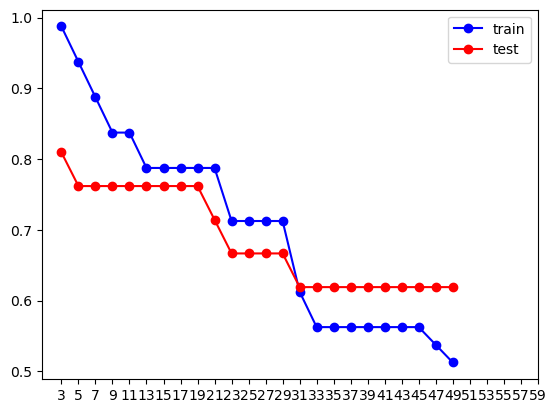

In [56]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"bo-")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"ro-")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()


#  Building the model for k=2

In [57]:
neighbour=KNC(n_neighbors=2)

In [58]:
from scipy import stats
import numpy as np
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=2 : ",train_acc,test_acc)

K=2 :  1.0 0.8095238095238095


#  Building the model for k=3

In [59]:
neighbour=KNC(n_neighbors=3)

In [60]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.9875 0.8095238095238095


#  Building the model for k=4

In [61]:
neighbour=KNC(n_neighbors=4)

In [62]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=4 : ",train_acc,test_acc)

K=4 :  0.9375 0.7619047619047619


#  Building the model for k=5

In [63]:
neighbour=KNC(n_neighbors=5)

In [64]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=5 : ",train_acc,test_acc)


K=5 :  0.9375 0.7619047619047619


# Finally the K=3 :  0.9875 0.8095238095238095 gives the best accuracy
